In [2]:
import glob

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import CARETLEFTBASE, CARETRIGHTBASE

all_files = glob.glob("roll_data/*-swing-on-strike.csv")

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

len(df)

84921

In [146]:
for attr in ['batter_buoyancy', 'batter_divinity', 'batter_martyrdom', 'batter_moxie', 'batter_musclitude', 'batter_patheticism', 'batter_thwackability', 'batter_tragicness', 'batter_coldness', 'batter_overpowerment', 'batter_ruthlessness', 'batter_shakespearianism', 'batter_suppression', 'batter_unthwackability', 'batter_base_thirst', 'batter_continuation', 'batter_ground_friction', 'batter_indulgence', 'batter_laserlikeness', 'batter_anticapitalism', 'batter_chasiness', 'batter_omniscience', 'batter_tenaciousness', 'batter_watchfulness', 'batter_pressurization', 'batter_cinnamon']:
    df[attr] = df[attr] * df['batter_multiplier']
for attr in ['pitcher_buoyancy', 'pitcher_divinity', 'pitcher_martyrdom', 'pitcher_moxie', 'pitcher_musclitude', 'pitcher_patheticism', 'pitcher_thwackability', 'pitcher_tragicness', 'pitcher_ruthlessness', 'pitcher_overpowerment', 'pitcher_unthwackability', 'pitcher_shakespearianism', 'pitcher_suppression', 'pitcher_coldness', 'pitcher_base_thirst', 'pitcher_continuation', 'pitcher_ground_friction', 'pitcher_indulgence', 'pitcher_laserlikeness', 'pitcher_anticapitalism', 'pitcher_chasiness', 'pitcher_omniscience', 'pitcher_tenaciousness', 'pitcher_watchfulness', 'pitcher_pressurization', 'pitcher_cinnamon']:
    df[attr] = df[attr] * df['pitcher_multiplier']

df['pitcher_ruth_with_vibe'] = df['pitcher_ruthlessness'] * (1 + 0.2 * df['pitcher_vibes'])
df['batter_moxie_with_vibe'] = df['pitcher_ruthlessness'] * (1 + 0.2 * df['batter_vibes'])
df['batter_musc_with_vibe'] = df['batter_musclitude'] * (1 + 0.2 * df['batter_vibes'])
df['batter_thwack_with_vibe'] = df['batter_thwackability'] * (1 + 0.2 * df['batter_vibes'])
df['batter_div_with_vibe'] = df['batter_divinity'] * (1 + 0.2 * df['batter_vibes'])

df['ruth_times_vibe'] = df['pitcher_ruthlessness'] * df['pitcher_vibes']
df['moxie_times_vibe'] = df['batter_moxie'] * df['batter_vibes']
df['path_times_vibe'] = df['batter_patheticism'] * df['batter_vibes']
df['thwack_times_vibe'] = df['batter_thwackability'] * df['batter_vibes']
df['musc_times_vibe'] = df['batter_musclitude'] * df['batter_vibes']
df['div_times_vibe'] = df['batter_divinity'] * df['batter_vibes']
df['filth_times_visc'] = df['ballpark_filthiness'] * df['ballpark_viscosity']

df.loc[df["pitcher_mods"].astype(str).str.contains("SCATTERED"),"pitcher_vibes"] = 0
# df.loc[df["batter_mods"].astype(str).str.contains("SCATTERED"),"batter_vibes"] = 0

# df[df["pitcher_mul"] != 1][["pitcher_mul", "pitcher_mods", "pitching_team_mods"]].drop_duplicates()

In [176]:
dfc = df
# for exclude_mod in ["OVERPERFORMING", "UNDERPERFORMING", "HIGH_PRESSURE", "GROWTH", "SINKING_SHIP", "TRAVELING"]:
for exclude_mod in ["FLINCH", "O_NO", "ON_FIRE", "GROWTH", "TRAVELING"]:
 dfc = dfc[~dfc["batter_mods"].astype(str).str.contains(exclude_mod)]
 dfc = dfc[~dfc["pitcher_mods"].astype(str).str.contains(exclude_mod)]
 dfc = dfc[~dfc["pitching_team_mods"].astype(str).str.contains(exclude_mod)]
 dfc = dfc[~dfc["batting_team_mods"].astype(str).str.contains(exclude_mod)]

# dfc = dfc[dfc['roll'] < 0.95]
# dfc = dfc[dfc['roll'] > 0.1]
dfc = dfc[(dfc['pitcher_multiplier'] == 1) & (dfc['batter_multiplier'] == 1)]
# dfc = dfc[(dfc['pitcher_vibes'].abs() < 0.2) & (dfc['batter_vibes'].abs() < 0.2)]
dfc = dfc[dfc['batter_patheticism'] > 0.1]

len(dfc)

40114

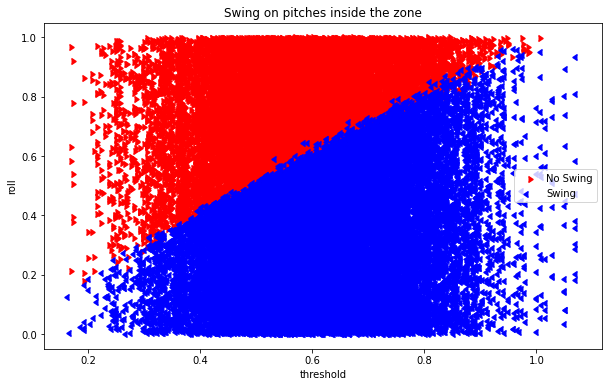

In [184]:
dfc['threshold'] = 0.682013-(
        0.39941986324858486 * (dfc['pitcher_ruthlessness'] + 0.2 * df['pitcher_vibes'])
        - 0.20159265010434763 * df['ballpark_viscosity']
        - 0.09009686226184446 * (df['batter_thwackability'] + 0.2 * df['batter_vibes'])
        - 0.09017895304646896 * (df['batter_musclitude'] + 0.2 * df['batter_vibes'])
        + 0.08765938715249999 * df['batter_patheticism']
        - 0.08870019117948015 * (df['batter_divinity'] + 0.2 * df['batter_vibes'])
        # + 0.0666 * (df['ballpark_filthiness'] * df['ballpark_viscosity'])
        # + 0.02 * df['ballpark_filthiness']
)


x_val = "threshold"
# x_val = "svc_best"
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.scatter(dfc[~dfc['passed']][x_val], dfc[~dfc['passed']]["roll"], color="red",
           label="No Swing", marker=CARETRIGHTBASE)
ax.scatter(dfc[dfc['passed']][x_val], dfc[dfc['passed']]["roll"], color="blue",
           label="Swing", marker=CARETLEFTBASE)
ax.set_xlabel(x_val)
ax.set_ylabel('roll')
ax.set_title("Swing on pitches inside the zone")
# ax.set_xlim(0.484, 0.499)

ax.legend()

,offset,event_type,home_score,away_score,top_of_inning,inning,pitcher_multiplier,batter_multiplier,baserunner_count,event_type,...,batter_musclitude,batter_name,pitcher_name,batter_mods,pitcher_mods,batting_team_mods,pitching_team_mods,day,game_id,play_count
46771,-0.047707,StrikeLooking,3.0,8.0,True,7,1.0,1.0,['5ca7e854-dc00-4955-9235-d7fcd732ddcf'],StrikeLooking,...,0.698159,Yusef Fenestrate,Agan Harrison,NaN,NaN,NaN,NaN,20,6f4a34bb-3391-481b-a828-fde9cf5356e8,277
82048,-0.046470,StrikeLooking,0.0,0.0,True,0,1.0,1.0,[],StrikeLooking,...,0.288658,T-eo --ng,PolkaDot Patterson,SCATTERED,SQUIDDISH;SWIM_BLADDER,LOVE,HIGH_PRESSURE,49,443dfb86-af65-4390-bb7a-71c9f1814c01,8
43066,-0.042552,StrikeLooking,2.0,0.0,False,1,1.0,1.0,[],StrikeLooking,...,0.196717,Caleb Novak,Flattery McKinley,FIRE_EATER,ALTERNATE,LIFE_OF_PARTY;ELECTRIC,UNDERSEA,18,10d4a29e-b724-49b9-bdb1-ce09f2392936,89
46867,-0.040745,StrikeLooking,3.0,8.0,True,8,1.0,1.0,[],StrikeLooking,...,0.280466,Stijn Strongbody,Agan Harrison,SWIM_BLADDER,NaN,NaN,NaN,20,6f4a34bb-3391-481b-a828-fde9cf5356e8,303
46047,-0.037500,StrikeLooking,2.0,3.0,True,3,1.0,1.0,['3188d641-4fcc-4d5e-887d-5f454b4c4ff8'],StrikeLooking,...,0.529377,Ayanna Dumpington,Agan Harrison,NaN,NaN,NaN,NaN,20,6f4a34bb-3391-481b-a828-fde9cf5356e8,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51201,0.040786,Foul,5.0,11.0,True,5,1.0,1.0,[],Foul,...,0.430239,Cantus Hojo,Flattery McKinley,NaN,ALTERNATE,BOTTOM_DWELLER,UNDERSEA,23,c119ef6e-67fe-4825-b39f-24bcbfc9b401,281
38405,0.047835,Out,1.0,0.0,True,8,1.0,1.0,['2b157c5c-9a6a-45a6-858f-bf4cf4cbc0bd'],Out,...,0.440947,Helga Burton,Nolanestophia Patterson,NaN,NaN,LOVE,NaN,14,2daf2993-bbf0-4ae4-ba76-f9612104e97e,289
64251,0.050702,Foul,7.0,5.0,False,8,1.0,1.0,['a8a5cf36-d1a9-47d1-8d22-4a665933a7cc'],Foul,...,0.688511,Grey Alvarado,Alaynabella Hollywood,REPEATING,NaN,NaN,NaN,36,c948f4f1-fdc4-48b9-84ea-f2e5a6cca68e,366
78924,0.053937,BaseHit,1.0,6.0,False,8,1.0,1.0,['b643a520-af38-42e3-8f7b-f660e52facc9'],BaseHit,...,0.228002,Evelton McBlase II,Nolanestophia Patterson,ALTERNATE;WANDERER,NaN,MAINTENANCE_MODE,NaN,46,11db81cc-a126-4f0f-866d-30ea7b6691e1,379


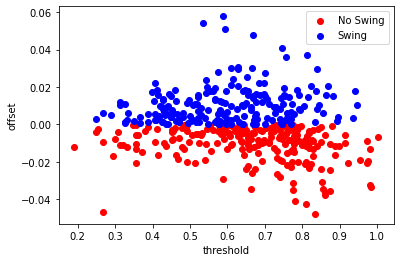

In [188]:
dfc["offset"] = dfc["roll"] - dfc["threshold"]
outliers = dfc[(dfc["passed"] & (dfc["offset"] >= 0)) | (~dfc["passed"] & (dfc["offset"] <= 0))]

fig, ax = plt.subplots(1)
x_val = "threshold"
ax.scatter(outliers[~outliers['passed']][x_val], outliers[~outliers['passed']]["offset"], color="red", label="No Swing")
ax.scatter(outliers[outliers['passed']][x_val], outliers[outliers['passed']]["offset"], color="blue", label="Swing")
ax.set_xlabel(x_val)
ax.set_ylabel('offset')
ax.legend()

table = outliers
table[["offset", "event_type", "home_score", "away_score", "top_of_inning", "inning",
       "pitcher_multiplier", "batter_multiplier", "baserunner_count", "event_type",
       "roll", "threshold", "batter_vibes", "pitcher_vibes",
       "pitcher_ruthlessness", "batter_musclitude",
       "batter_name", "pitcher_name", "batter_mods", "pitcher_mods",
       "batting_team_mods", "pitching_team_mods", "day",  "game_id", "play_count"]].sort_values('offset')
# len(table)

In [ ]:
X = dfc[['roll', 'passed',
        'batter_div_with_vibe', 'batter_musc_with_vibe', 'batter_patheticism', 'batter_thwack_with_vibe',
        'pitcher_ruth_with_vibe',
    'ballpark_viscosity']]
# X = X[X['roll'] < 0.85]

# X = dfc[['roll', 'pitcher_ruthlessness', 'ballpark_forwardness']]
# X = dfc[['roll', 'pitcher_ruthlessness']]
y = X['passed']
X = X.drop('passed', axis=1)

In [181]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm, linear_model

# # trainedsvm = svm.SVC(kernel='linear').fit(X, y)
# trainedsvm = svm.LinearSVC(dual=False, max_iter=100000).fit(X, y)
# predictionsvm = trainedsvm.predict(X)
# print(confusion_matrix(y,predictionsvm))
# print(classification_report(y,predictionsvm))

sc = StandardScaler()
X2 = sc.fit_transform(X)

trainedsvm = svm.LinearSVC(dual=False, max_iter=100000, C=1000).fit(X2, y)
predictionsvm = trainedsvm.predict(X2)
print(confusion_matrix(y,predictionsvm))
print(classification_report(y,predictionsvm))

[[16018    80]
 [   77 23939]]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     16098
        True       1.00      1.00      1.00     24016

    accuracy                           1.00     40114
   macro avg       1.00      1.00      1.00     40114
weighted avg       1.00      1.00      1.00     40114



In [182]:
coef = np.true_divide(trainedsvm.coef_, sc.scale_)
coef_scaled = coef / coef[0, 0]
coef_list = coef_scaled.tolist()[0]
sorted(zip(coef_list, X.columns), key=lambda x: abs(x[0]), reverse=True)

[(1.0, 'roll'),
 (0.39941986324858486, 'pitcher_ruth_with_vibe'),
 (-0.20159265010434763, 'ballpark_viscosity'),
 (-0.09017895304646896, 'batter_musc_with_vibe'),
 (-0.09009686226184446, 'batter_thwack_with_vibe'),
 (-0.08870019117948015, 'batter_div_with_vibe'),
 (0.08765938715249999, 'batter_patheticism')]

In [183]:
intercept = trainedsvm.intercept_ - np.dot(coef, sc.mean_)
intercept_scaled = intercept / coef[0, 0]
intercept_scaled

array([-0.68201329])

In [11]:
df.sort_values('pitcher_ruthlessness')[['pitcher_name', 'pitcher_ruthlessness', 'pitcher_multiplier']]

,pitcher_name,pitcher_ruthlessness,pitcher_multiplier
4441,Flattery McKinley,0.060292,1.00
5041,Flattery McKinley,0.060292,1.00
5040,Flattery McKinley,0.060292,1.00
5039,Flattery McKinley,0.060292,1.00
5036,Flattery McKinley,0.060292,1.00
...,...,...,...
13421,PolkaDot Patterson,1.695776,1.25
13417,PolkaDot Patterson,1.695776,1.25
53725,PolkaDot Patterson,1.695776,1.25
13450,PolkaDot Patterson,1.695776,1.25


In [12]:
dfc[dfc['pitcher_ruthlessness'] > 1.6]

,Unnamed: 0,event_type,roll,passed,batter_buoyancy,batter_divinity,batter_martyrdom,batter_moxie,batter_musclitude,batter_patheticism,...,batter_moxie_with_vibe,ruth_times_vibe,moxie_times_vibe,path_times_vibe,thwack_times_vibe,musc_times_vibe,div_times_vibe,filth_times_visc,threshold,offset


In [13]:
outliers = dfc[~dfc['passed'] & (dfc['roll'] < 0.1)]
outliers

,Unnamed: 0,event_type,roll,passed,batter_buoyancy,batter_divinity,batter_martyrdom,batter_moxie,batter_musclitude,batter_patheticism,...,batter_moxie_with_vibe,ruth_times_vibe,moxie_times_vibe,path_times_vibe,thwack_times_vibe,musc_times_vibe,div_times_vibe,filth_times_visc,threshold,offset


In [14]:
outliers['batter_moxie'] - outliers['pitcher_ruthlessness']

Series([], dtype: float64)

In [15]:
list(df.columns)

['Unnamed: 0',
 'event_type',
 'roll',
 'passed',
 'batter_buoyancy',
 'batter_divinity',
 'batter_martyrdom',
 'batter_moxie',
 'batter_musclitude',
 'batter_patheticism',
 'batter_thwackability',
 'batter_tragicness',
 'batter_coldness',
 'batter_overpowerment',
 'batter_ruthlessness',
 'batter_shakespearianism',
 'batter_suppression',
 'batter_unthwackability',
 'batter_base_thirst',
 'batter_continuation',
 'batter_ground_friction',
 'batter_indulgence',
 'batter_laserlikeness',
 'batter_anticapitalism',
 'batter_chasiness',
 'batter_omniscience',
 'batter_tenaciousness',
 'batter_watchfulness',
 'batter_pressurization',
 'batter_cinnamon',
 'batter_multiplier',
 'pitcher_buoyancy',
 'pitcher_divinity',
 'pitcher_martyrdom',
 'pitcher_moxie',
 'pitcher_musclitude',
 'pitcher_patheticism',
 'pitcher_thwackability',
 'pitcher_tragicness',
 'pitcher_ruthlessness',
 'pitcher_overpowerment',
 'pitcher_unthwackability',
 'pitcher_shakespearianism',
 'pitcher_suppression',
 'pitcher_coldn